In [1]:
!git clone https://github.com/toby766/Hamoye_capstone_project_smote.git

Cloning into 'Hamoye_capstone_project_smote'...
remote: Enumerating objects: 10798, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 10798 (delta 7), reused 14 (delta 3), pack-reused 10768
Receiving objects: 100% (10798/10798), 358.61 MiB | 42.72 MiB/s, done.
Resolving deltas: 100% (12/12), done.
Updating files: 100% (10806/10806), done.


In [2]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob


In [3]:
IMAGE_SIZE = [224, 224]

train_path = './Hamoye_capstone_project_smote/Data/train'
valid_path = './Hamoye_capstone_project_smote/Data/test'

In [4]:
vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

2022-03-31 16:33:39.724561: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-31 16:33:39.806594: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-31 16:33:39.807278: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-31 16:33:39.808406: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

58900480/58889256 [==============================] - 0s 0us/step


In [5]:
for layer in vgg16.layers:
    layer.trainable = False

In [6]:
folders = glob('./Hamoye_capstone_project_smote/Data/train/*')

In [7]:
folders

['./Hamoye_capstone_project_smote/Data/train/Rhino',
 './Hamoye_capstone_project_smote/Data/train/Elephant',
 './Hamoye_capstone_project_smote/Data/train/Zebra',
 './Hamoye_capstone_project_smote/Data/train/Buffalo']

In [8]:
x = Flatten()(vgg16.output)

In [9]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg16.input, outputs=prediction)

In [10]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
training_set = train_datagen.flow_from_directory('./Hamoye_capstone_project_smote/Data/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 7556 images belonging to 4 classes.


In [13]:
test_set = test_datagen.flow_from_directory('./Hamoye_capstone_project_smote/Data/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')
val_data = test_datagen.flow_from_directory('./Hamoye_capstone_project_smote/Data/val',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')


Found 1084 images belonging to 4 classes.
Found 2160 images belonging to 4 classes.


In [14]:
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint("vgg16.hdf5", monitor='loss', verbose=1,
    save_best_only=True, mode='auto', period=1)

r = model.fit(
  training_set,
  validation_data=val_data,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(val_data)
)
model.save_weights("vgg16.hdf5")

2022-03-31 16:33:45.707492: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10


2022-03-31 16:33:47.425655: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


237/237 [==============================] - 108s 417ms/step - loss: 0.3673 - accuracy: 0.8629 - val_loss: 0.1567 - val_accuracy: 0.9431
Epoch 2/10
237/237 [==============================] - 97s 409ms/step - loss: 0.1673 - accuracy: 0.9403 - val_loss: 0.1167 - val_accuracy: 0.9593
Epoch 3/10
237/237 [==============================] - 98s 413ms/step - loss: 0.1364 - accuracy: 0.9502 - val_loss: 0.1601 - val_accuracy: 0.9389
Epoch 4/10
237/237 [==============================] - 97s 410ms/step - loss: 0.1181 - accuracy: 0.9565 - val_loss: 0.1350 - val_accuracy: 0.9505
Epoch 5/10
237/237 [==============================] - 98s 411ms/step - loss: 0.0924 - accuracy: 0.9657 - val_loss: 0.0887 - val_accuracy: 0.9676
Epoch 6/10
237/237 [==============================] - 99s 415ms/step - loss: 0.0687 - accuracy: 0.9750 - val_loss: 0.1244 - val_accuracy: 0.9551
Epoch 7/10
237/237 [==============================] - 97s 408ms/step - loss: 0.0638 - accuracy: 0.9779 - val_loss: 0.1083 - val_accuracy: 0.

In [15]:
_, acc = model.evaluate(test_set, steps=len(test_set), verbose=0)
print('Accuracy: %.3f' % (acc * 100.0))

Accuracy: 95.111


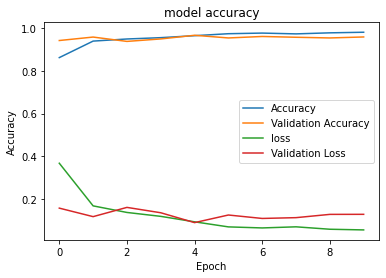

In [16]:
import matplotlib.pyplot as plt
plt.plot(r.history["accuracy"])
plt.plot(r.history['val_accuracy'])
plt.plot(r.history['loss'])
plt.plot(r.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

In [17]:
y_val = test_set.classes

In [18]:
from sklearn.metrics import classification_report,confusion_matrix
predictions = model.predict(test_set, verbose=0)


print(classification_report( y_val, predictions.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.22      0.23      0.22       271
           1       0.23      0.26      0.24       271
           2       0.22      0.20      0.21       271
           3       0.25      0.23      0.24       271

    accuracy                           0.23      1084
   macro avg       0.23      0.23      0.23      1084
weighted avg       0.23      0.23      0.23      1084

